In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [11]:
data3 = pd.read_csv("AMZN (2).csv")
data4 = pd.read_csv("AMZN (3).csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [12]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,577.090027,600.099976,547.179993,596.380005,596.380005,22845900
1,2016-01-25,597.989990,638.059998,570.000000,587.000000,587.000000,42007500
2,2016-02-01,578.150024,581.799988,499.190002,502.130005,502.130005,38623800
3,2016-02-08,486.470001,516.750000,474.000000,507.079987,507.079987,36471800
4,2016-02-15,519.479980,541.200012,511.660004,534.900024,534.900024,19652200


In [13]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,1930.005395,1827.474099,2046.179066
433,2020-08-25,1931.103518,1818.825970,2038.881602
434,2020-08-26,1932.084925,1825.251903,2040.213563
435,2020-08-27,1932.946438,1821.951053,2046.008409
436,2020-08-28,1933.688005,1821.048699,2043.234323


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

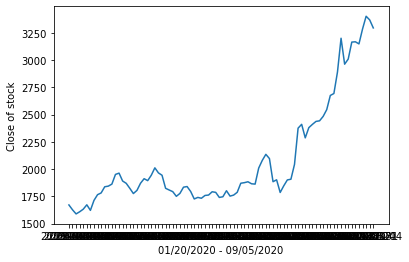

In [15]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

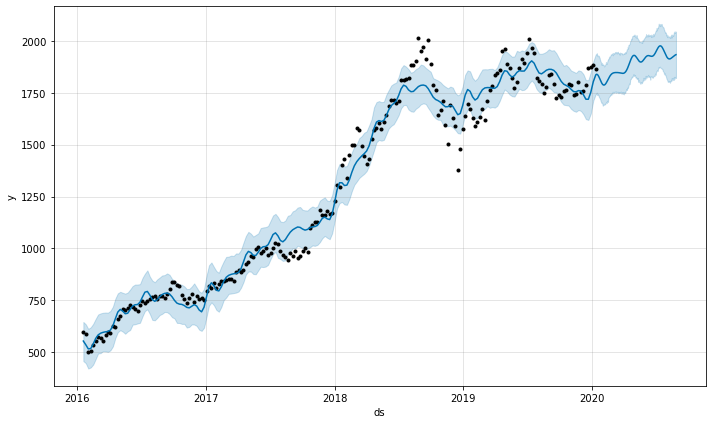

In [25]:
fig1 = m4.plot(forecast)

In [23]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
81,2020-08-10,3170.310059,3217.52002,3073.000000,3148.020020,3148.020020,16313300
82,2020-08-17,3173.120117,3320.00000,3154.179932,3284.719971,3284.719971,19130700
83,2020-08-24,3310.149902,3453.00000,3257.560059,3401.800049,3401.800049,22329600
84,2020-08-31,3408.989990,3552.25000,3303.000000,3368.000000,3368.000000,19708200
85,2020-09-04,3318.000000,3381.50000,3111.129883,3294.620117,3294.620117,8648996


In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,1886.409298,1827.474099,2046.179066,1834.443626,1937.838513,43.596097,43.596097,43.596097,43.596097,43.596097,43.596097,0.0,0.0,0.0,1930.005395
433,2020-08-25,1886.607422,1818.825970,2038.881602,1834.260886,1938.246395,44.496096,44.496096,44.496096,44.496096,44.496096,44.496096,0.0,0.0,0.0,1931.103518
434,2020-08-26,1886.805547,1825.251903,2040.213563,1834.095836,1938.650684,45.279378,45.279378,45.279378,45.279378,45.279378,45.279378,0.0,0.0,0.0,1932.084925
435,2020-08-27,1887.003672,1821.951053,2046.008409,1833.940329,1939.066105,45.942766,45.942766,45.942766,45.942766,45.942766,45.942766,0.0,0.0,0.0,1932.946438
436,2020-08-28,1887.201797,1821.048699,2043.234323,1833.899613,1939.593859,46.486208,46.486208,46.486208,46.486208,46.486208,46.486208,0.0,0.0,0.0,1933.688005


In [2]:
amazon_impact = (3294.620117 - 1933.688005)/1933.688005 * 100
print("Amazon's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", amazon_impact, "% as of 09/05/2020")

Amazon's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 70.38012898052807 % as of 09/05/2020
